## Objetivo del notebook

El actual notebook tiene como objetivo realizar un analisis exploratorio de los datos con los que contamos para el desarrollo de la competicion.
En cuanto al analisis propio a realizar, el notebook agrupa revisiones del conjunto de datos, y visualizaciones que puedan ayudarnos a descubrir patrones o insights valiosos de nuestros datos.

# Importar las librerias a utilizar

La siguiente celda reune el codigo necesario para importar todas las librerias de las que se hacen uso en el presente notebook.

In [1]:
# Librerias para analisis y manipulacion de datos
import numpy as np
import pandas as pd

# Librerias para visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Otros
import os

os.chdir('../')
from src.visualizations.visualization import line_plot, hist_distrib, box_plot, pie_plot, scatter_plot, violin_plot

os.chdir('notebooks/')

# Analisis exploratorio del conjunto de datos

Para el analisis de datos en este notebook, solamente se tendra en cuenta el fichero train.csv. Este fichero contiene todo el conjunto de datos que usaremos para entrenar a nuestro modelo. 

Para la competicion, Kaggle ya nos proporciona un fichero test.csv, que es aquel para el que debemos generar las predicciones, recogidas en el fichero que entregamos como resultado de la competicion.

In [2]:
## Cargo en memoria el conjunto de entrenamiento

# Ruta del fichero train.csv
train_dataset__route = "../data/raw/train/train.csv"

# Instancio un objeto dataframe que cargue el conjunto de datos de entrenamiento
data_df = pd.read_csv(train_dataset__route, low_memory = False)

# 10 primeros registros del dataframe
data_df.head(10)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [3]:
# Ejecuto el metodo .info() para obtener informacion del dataframe
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

Nuestro conjunto de datos cuenta con un total de 23 caracteristicas (+1 si tenemos en cuenta la variable objetivo) que podemos utilizar como potenciales predictoras para la clasificacion final de la persona, como fumador o no fumador.

La ejecucion del metodo .info(), nos muestra informacion valiosa, como el numero de instancias con las que contamos (159255, lo cual convierte a este conjunto de entrenamiento en una fuente bastante rica para nuestro objetivo), asi como, por ejemplo, el tipo de datos contiene cada una de las variables del dataset (todas ellas son variables numericas, lo cual simplifica enormemente el prprocesamiento final de los datos).

In [4]:
# Ejecuto el metodo .describe() para obtener informacion estadistica del conjunto de datos
data_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


La informacion estadistica que nos muestra la celda anterior, indica informacion relevante en relacion al conjunto de registros de una variable dada. El metodo .describe() tiene en cuenta unicamente variables numericas; al contar nuestro dataset unicamente con variables de este tipo, se han incluido todas.

## Correlacion

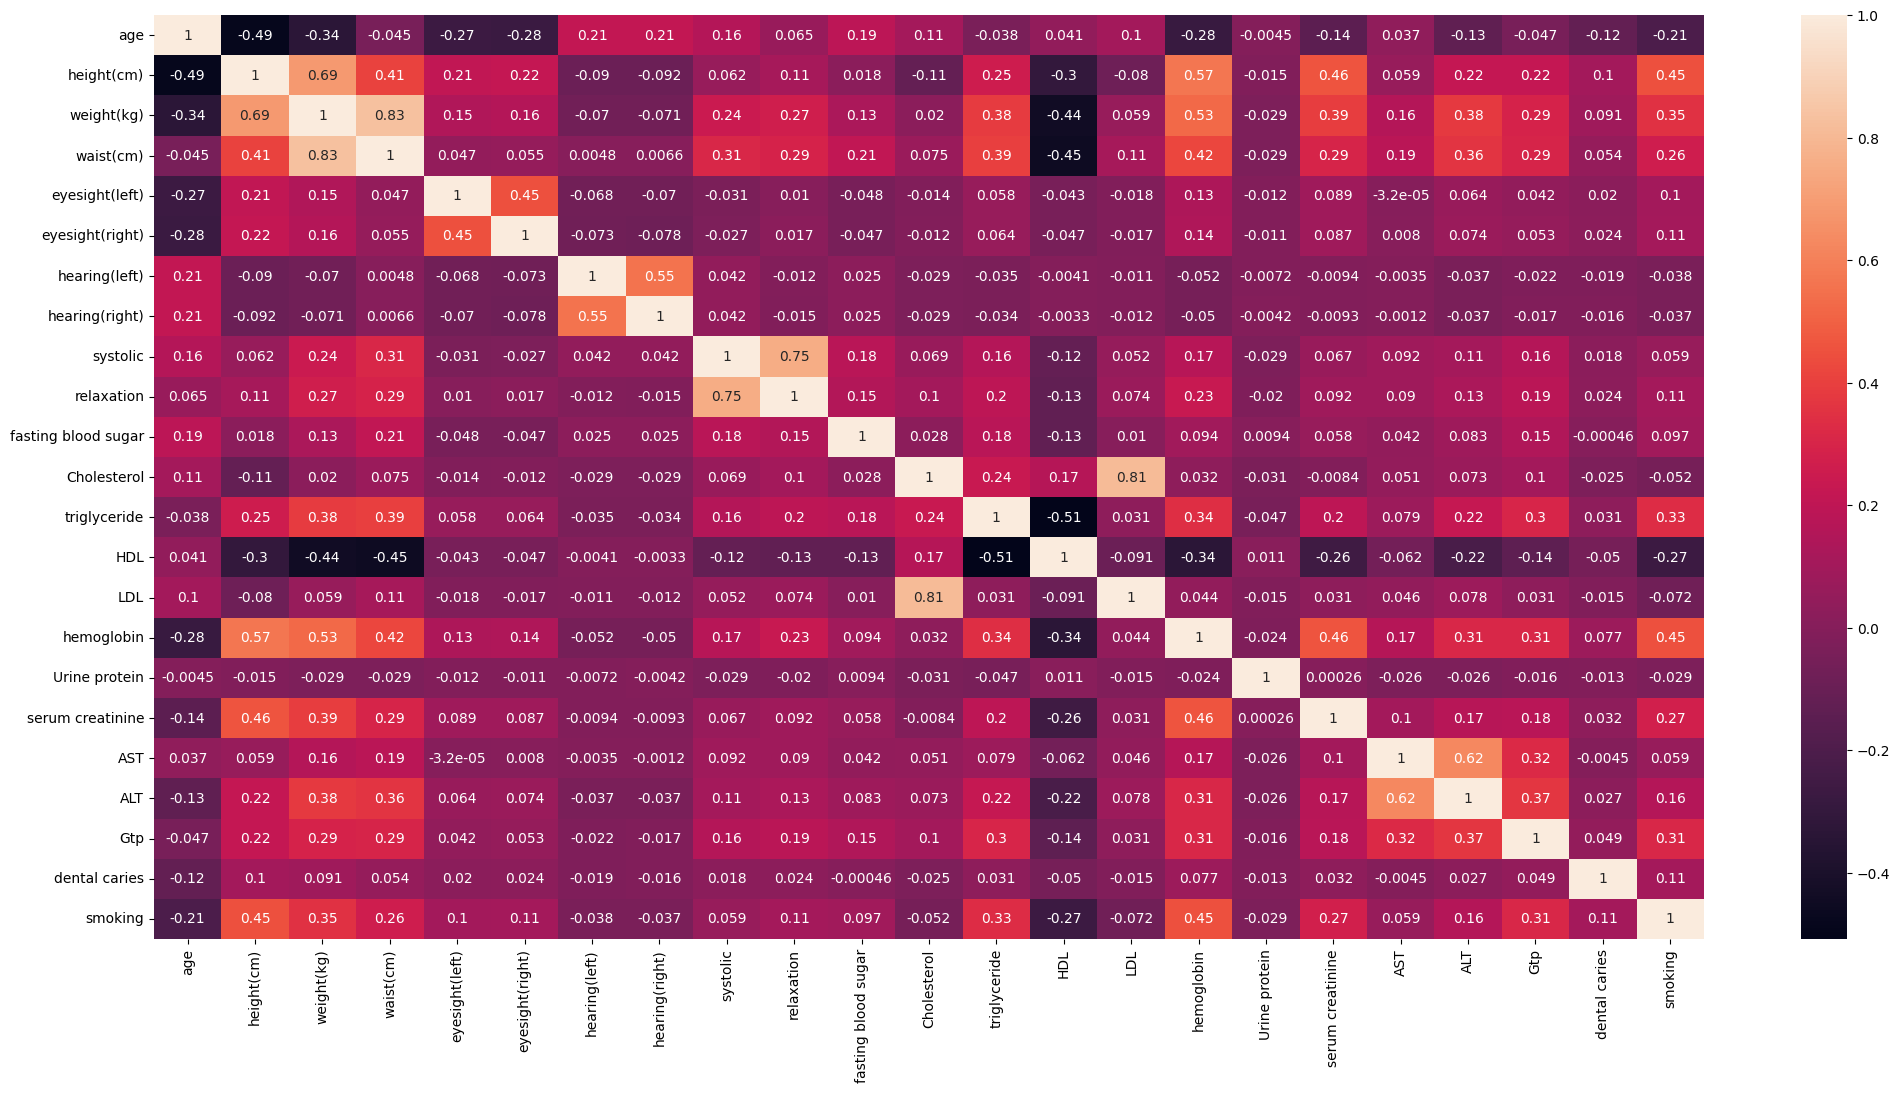

In [5]:
# Defino una matriz con los coeficientes de correlacion entre las variables del dataset
corr_matrix = data_df.drop(columns = ['id']).corr()

# Represento la matriz de correlacion en un mapa de calor 
plt.figure(figsize = (25, 12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

La matriz de correlacion muestra como muchas de las variables con las que contamos mantienen una relacion lineal con la variable objetivo. Otras tantas no registran un coeficiente con el que podamos considerar que se mantiene una relacion lineal significativa con la variable objetivo, aunque esto no quiere decir que la variable no mantenga ningun otro tipo de relacion con la variable de salida (la correlacion de Pearson es un indicativo unicamente de la relacion lineal entre dos variables).

# Visualizacion

Las siguientes celdas muestran diversos graficos que representan diferentes distribuciones en relacion a los datos contenidos en el dataset.

### Histograma clases variable objetivo

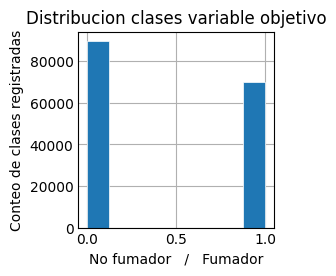

In [6]:
conteo_clases_smoking = [0 if instance == 0 else 1 for instance in data_df['smoking']]

img_route = '../src/images/'
img_name = 'hist_classes.png'
# Represento un histograma de las clases registradas
hist_distrib(conteo_clases_smoking,
             x_label='No fumador   /   Fumador',
             y_label="Conteo de clases registradas",
             title = 'Distribucion clases variable objetivo',
             img_route= img_route,
             image_name= img_name)

El dataset registra instancias de muchas observaciones que corresponden a gente fumadora. Es cierto que no encontramos un balance perfecto de clases, pero es bueno, puesto que  representa en cierto modo la realidad (muchas personas fuman, pero existe un mayor numero de personas las cuales no lo hacen).

En cualquier caso, se entrenara un primer modelo asi, y, en caso de notar algun tipo de desviacion o subajuste con respecto a alguna clase, trataremos de equilibrar el balance de registros de estas con aplicando un enfoque SMOTE.